In [29]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)  

In [30]:
#reading dataframe
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#number of raws and columns
train.shape
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Barchart for categirical features  
Pclass  
Name  
Sibsp  
Embarked  
Sex



In [32]:
#visualisation of dependency of dependent and independent variable
def bar_chart(feature):
    survived = train.copy()[train["Survived"] == 1][feature].value_counts()
    died = train.copy()[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived,died])
    df.index = ["survived","died"]
    df.plot(kind = "bar", stacked = True)
   
    


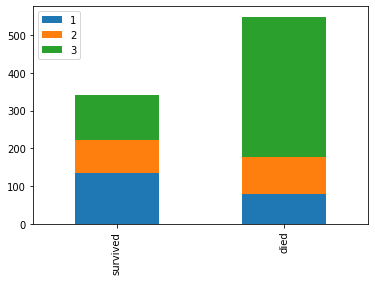

In [33]:
bar_chart("Pclass")
#more people died from Cabin 3

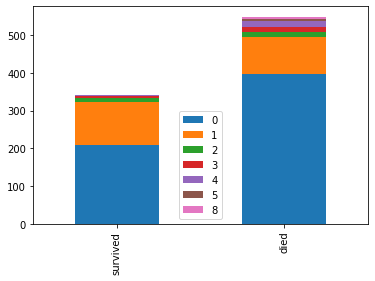

In [34]:
bar_chart('SibSp')

## Feature Engineering

In [35]:
train_test_data = [test,train]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.' , expand = False) 

In [36]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Ms            1
Countess      1
Don           1
Capt          1
Mme           1
Lady          1
Sir           1
Name: Title, dtype: int64

In [42]:
test['Title'].value_counts()

0.0    240
1.0     78
2.0     72
3.0     27
Name: Title, dtype: int64

### Title Map:
Mr : 0  
Miss : 1  
Mrs : 2     
Others :3


In [38]:
title_mapping = { 'Mr' : 0, 'Miss' : 1, 'Mrs' : 2, 'Master' :3, 'Dr' : 3, 'Rev' : 3 , 'Major' :3 , 'Col' : 3 ,  'Mlle' : 3  ,'Jonkheer' :3 ,'Ms' : 3,  'Countess' :3 , 'Don' :3 ,'Capt':3  ,'Mme' :3 ,'Lady':3 , 'Sir' :3} 
 
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

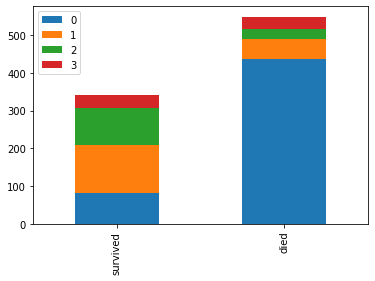

In [39]:
bar_chart('Title')

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [41]:
#droping coloumn Name
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

### Sex 
Male : 0    
Female : 1

In [47]:
Sex_mapping = { 'male' : 0 , 'female' : 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(Sex_mapping)

In [51]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Embarked Mapping


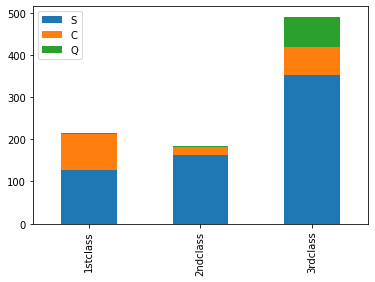

In [86]:
pclass1 = train[train["Pclass"] == 1]["Embarked"].value_counts()
pclass2 = train[train["Pclass"] == 2]["Embarked"].value_counts()
pclass3 = train[train["Pclass"] == 3]["Embarked"].value_counts()

df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index = ['1stclass', '2ndclass' ,'3rdclass']
df.plot(kind = 'bar', stacked = True)

#### In all the three classes most of the passengers are from 'S',   
#### So we fill missing value with 'S'

In [87]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [88]:
train['Embarked'].unique() #no more null values

array(['S', 'C', 'Q'], dtype=object)

In [89]:
emb_mapping = {'S' : 1, 'C' :2 , 'Q' : 3}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(emb_mapping)

###### Family Size
Combining Parch and SibSp

In [97]:
train["Family Size"] = train["Parch"] + train["SibSp"] 
test["Family Size"] = test["Parch"] + test["SibSp"] 

(0, 10.0)

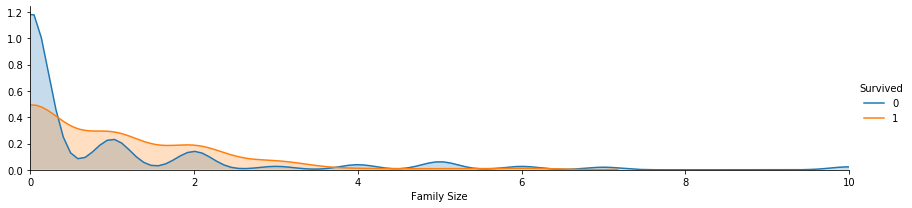

In [98]:
facet =  sns.FacetGrid(train , hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Family Size' ,shade = True)
facet.set(xlim = (0,train['Family Size'].max()))
facet.add_legend()
plt.xlim(0)


In [ ]:
family_mapping = { '0' : 0 , '1' : 0.4, '2' : 0.8, '3' : 1.2 , '4' : 1.6, '5' : 2 , '6' : 2.4 ,'7' : 2.8 ,'8' : 3.2 ,'9' : 3.6 ,  '10' : 4 }